In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [130]:
data=pd.read_csv("/Users/saibodavula/Downloads/delivery_time.csv")
data=data.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'})

In [131]:
data=pd.DataFrame(data)

In [132]:
data.columns

Index(['DT', 'ST'], dtype='object')

In [133]:
data.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [134]:
data.shape

(21, 2)

Text(0, 0.5, 'DT')

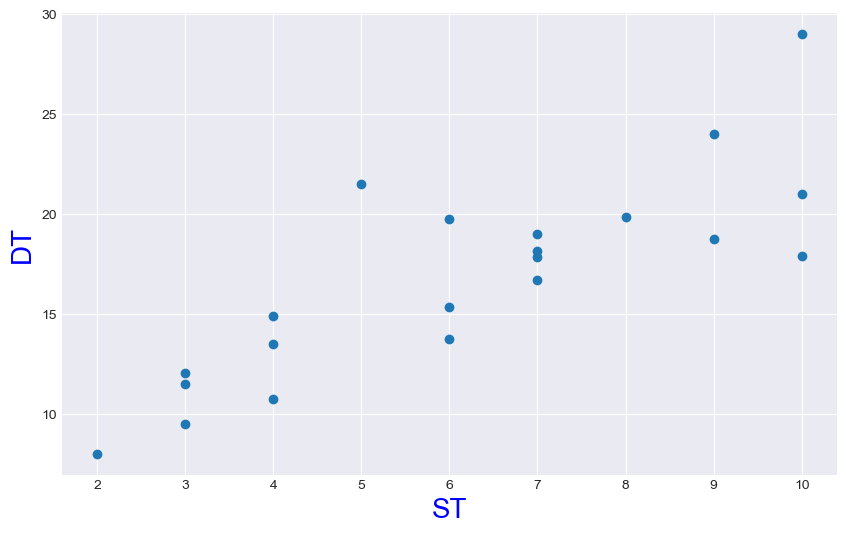

In [135]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["ST"],data["DT"])
plt.xlabel("ST",size=20,color="blue")
plt.ylabel("DT",size=20,color="blue")

In [136]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [138]:
model=LinearRegression()
model.fit(data[["ST"]],data[["DT"]])

LinearRegression()

In [139]:
yhat=model.predict(data[["ST"]])

In [140]:
yhat

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

Text(0, 0.5, 'DT')

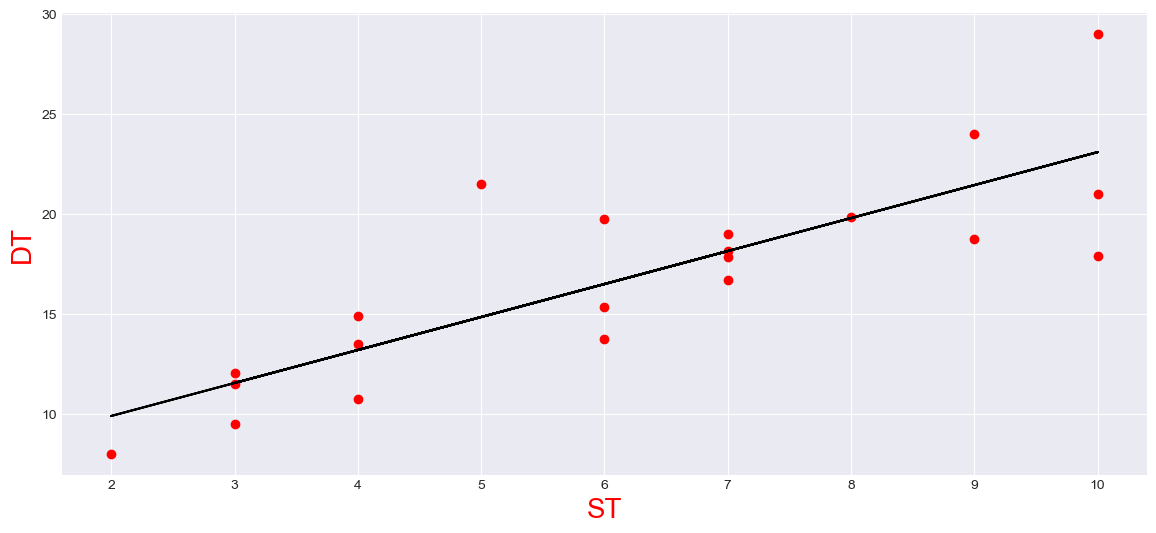

In [141]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["ST"],data["DT"],color="red")
plt.plot(data["ST"],yhat,color="black")


plt.xlabel("ST",size=20,color="red")
plt.ylabel("DT",size=20,color="red")

In [142]:
model.intercept_

array([6.58273397])

In [143]:
model.coef_

array([[1.6490199]])

In [145]:
r2_score(data["DT"],yhat)

0.6822714748417231

# Transformations

In [150]:
import statsmodels.formula.api as smf

In [165]:
model2=smf.ols("DT~ST",data=data).fit()

In [166]:
model2

model2.summary()

In [167]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        19:48:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
model2=smf.ols("np.log(DT)~ST",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                        19:48:18   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
model2=smf.ols("np.log(DT)~np.log(ST)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                        19:48:20   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
model2=smf.ols("DT~np.log(ST)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        19:41:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
model2=smf.ols("np.sqrt(DT)~np.log(ST)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(DT)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     54.29
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           5.57e-07
Time:                        19:41:48   Log-Likelihood:                -5.2748
No. Observations:                  21   AIC:                             14.55
Df Residuals:                      19   BIC:                             16.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0619      0.279      7.381      0.000       1.477       2.647
np.log(ST)     1.1513      0.156      7.368      0.000       0.824       1.478
==============================================================================
Omnibus:                        3.060   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                1.865
Skew:                           0.727   Prob(JB):                        0.394
Kurtosis:                       3.127   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
model2=smf.ols("np.sqrt(DT)~ST",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(DT)   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.00e-06
Time:                        19:42:04   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
ST             0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
model2=smf.ols("np.sqrt(DT)~np.sqrt(ST)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(DT)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           8.48e-07
Time:                        19:42:25   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(ST)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
model2=smf.ols("DT~np.sqrt(ST)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.61e-06
Time:                        19:42:38   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""